In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('/content/collegePlace.csv')

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df.Stream.value_counts()

Stream
Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: count, dtype: int64

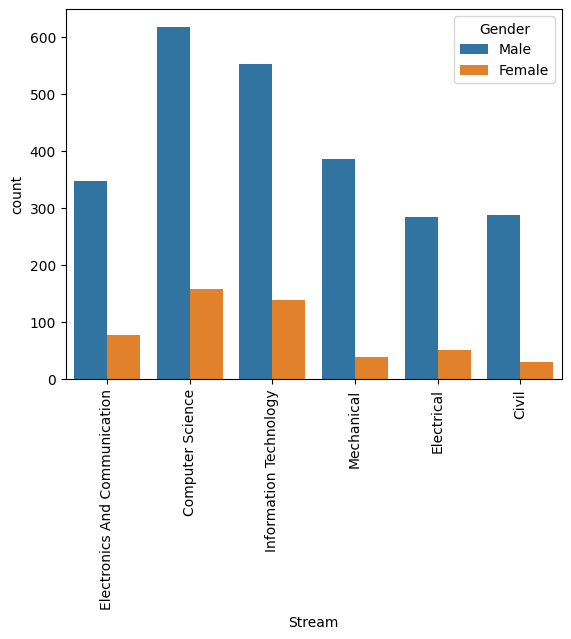

In [ ]:
sns.countplot(x='Stream',data=df,hue='Gender')
plt.xticks(rotation=90)
plt.show()

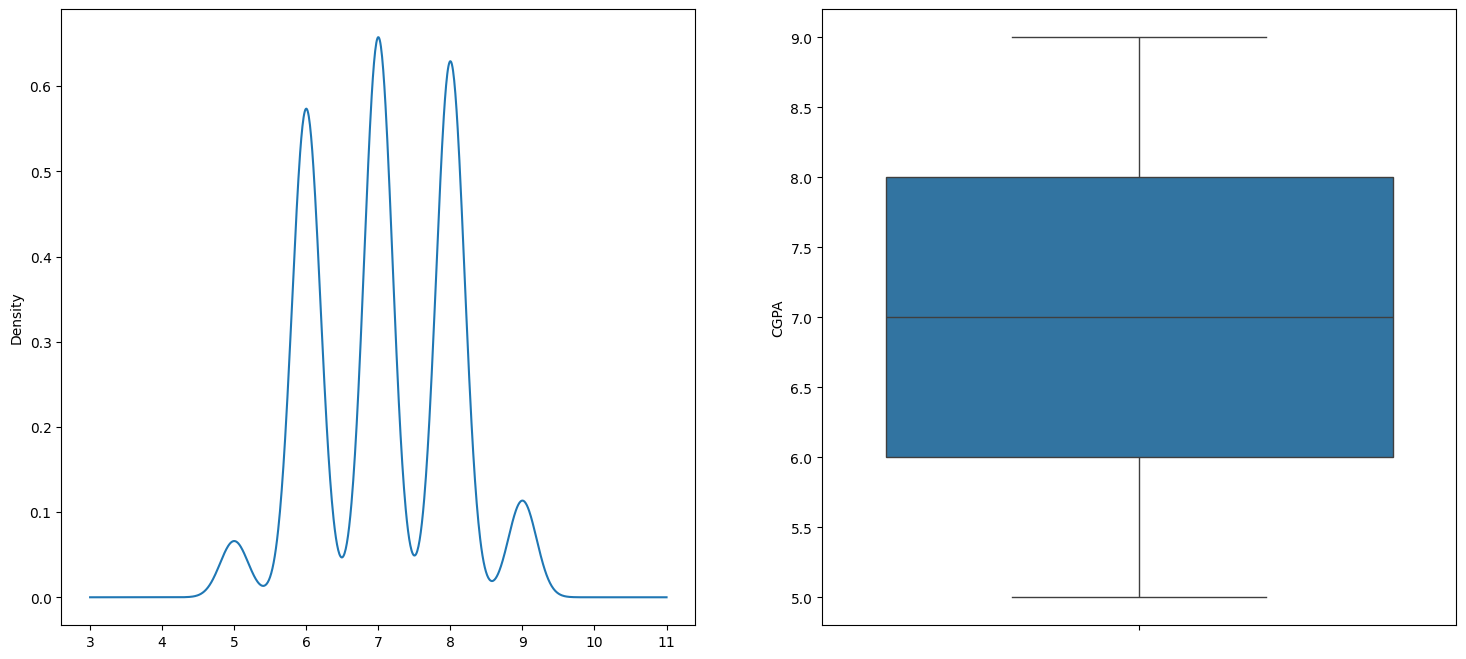

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['CGPA'].plot.density(ax=ax[0])
sns.boxplot(y='CGPA',data=df,ax=ax[1])
plt.show()

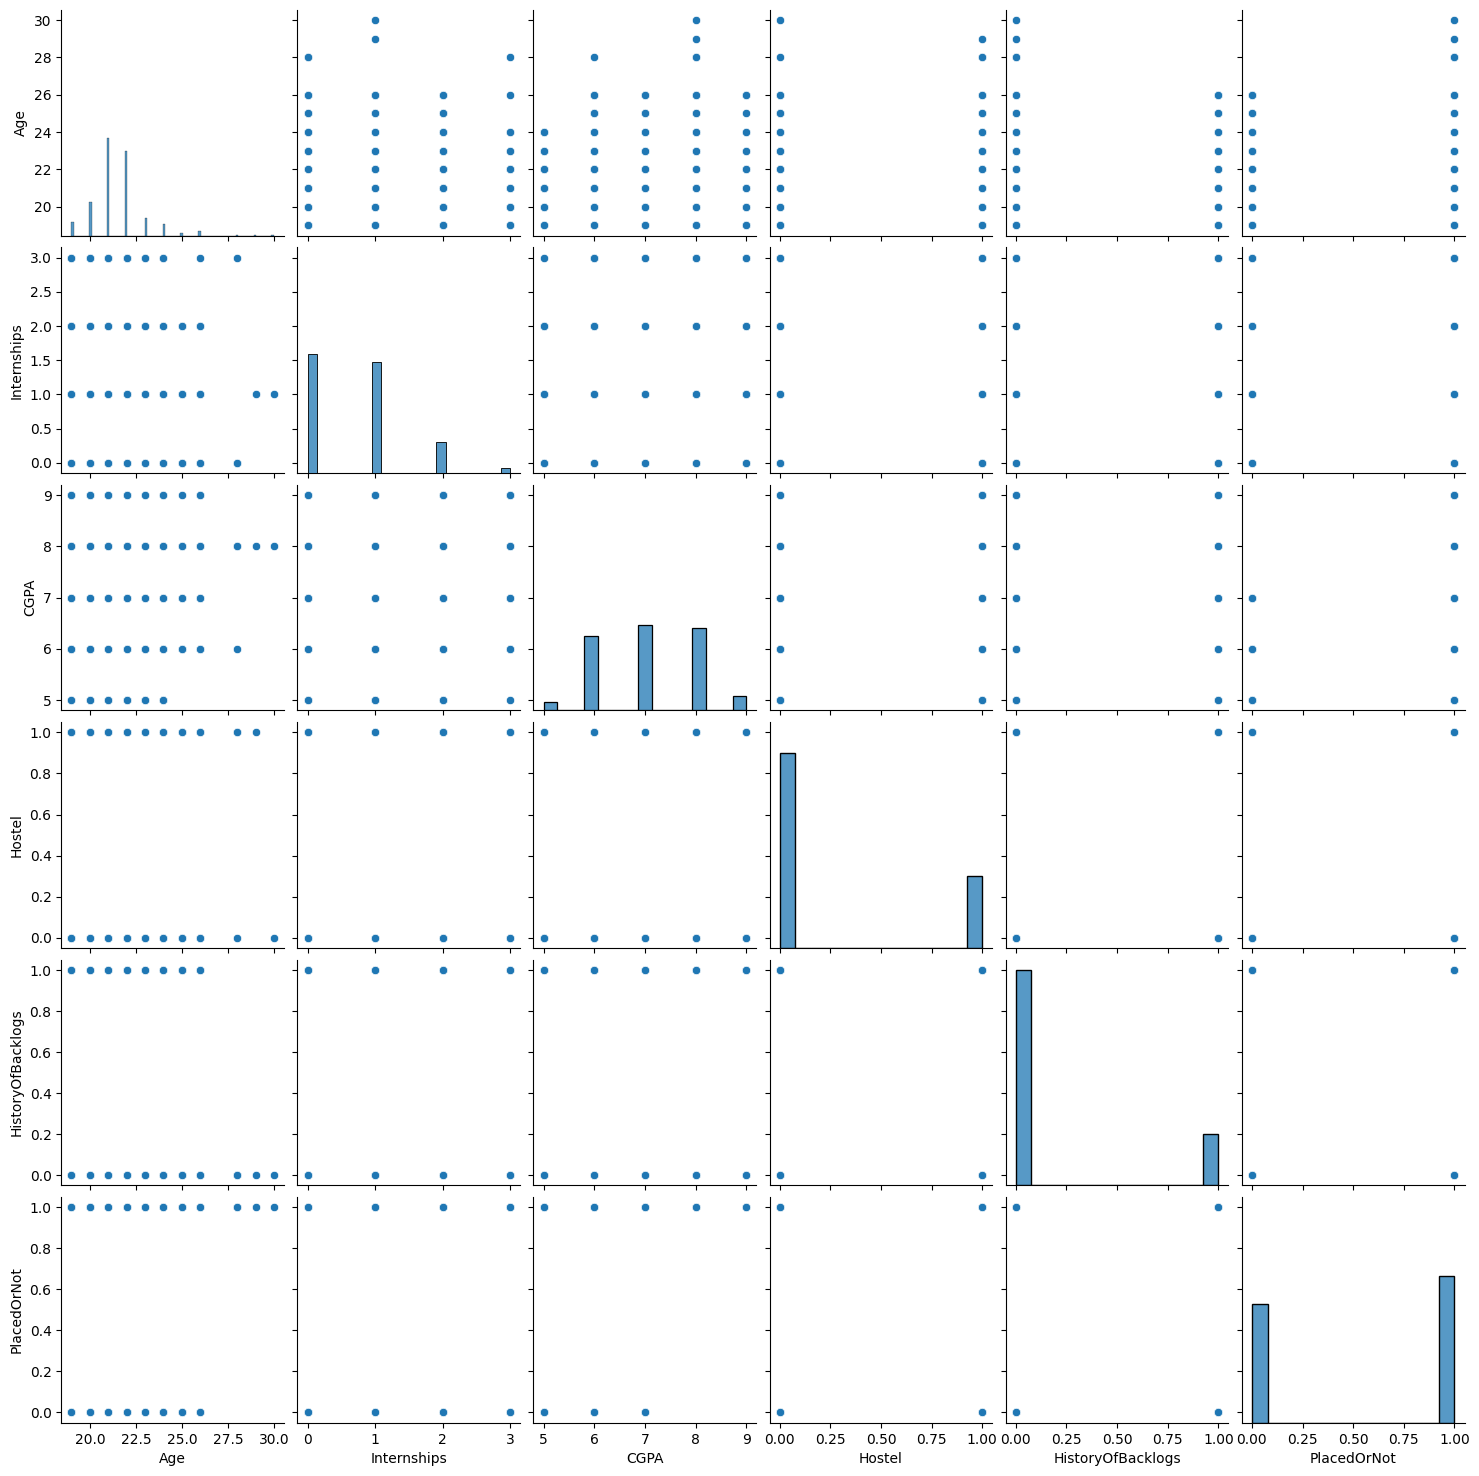

In [ ]:
sns.pairplot(df)

<Axes: >

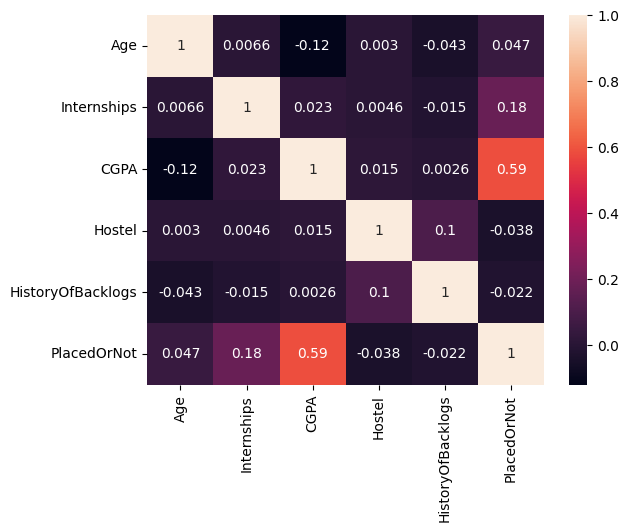

In [ ]:
cor=df.select_dtypes(include=["number"]).corr()
sns.heatmap(cor,annot=True)

In [ ]:
encoded_data=pd.get_dummies(df['Stream'],drop_first=True)

In [ ]:
import pandas as pd
df = pd.concat([df, encoded_data], axis=1)
df.drop('Stream', axis=1, inplace=True)
df.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,Male,1,8,1,1,1,False,False,True,False,False
1,21,Female,0,7,1,1,1,True,False,False,False,False
2,22,Female,1,6,0,0,1,False,False,False,True,False
3,21,Male,0,8,0,1,1,False,False,False,True,False
4,22,Male,0,8,1,0,1,False,False,False,False,True


In [ ]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [ ]:
df.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,1,1,8,1,1,1,False,False,True,False,False
1,21,0,0,7,1,1,1,True,False,False,False,False
2,22,0,1,6,0,0,1,False,False,False,True,False
3,21,1,0,8,0,1,1,False,False,False,True,False
4,22,1,0,8,1,0,1,False,False,False,False,True


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('PlacedOrNot',axis=1),df['PlacedOrNot'],test_size=0.2,random_state=42)

In [ ]:
ran_for=RandomForestClassifier()
grad_boost=GradientBoostingClassifier()
svc=SVC()
knn=KNeighborsClassifier()
voting=VotingClassifier(estimators=[('ran_for',ran_for),('grad_boost',grad_boost),('svc',svc),('knn',knn)],voting='hard')

In [ ]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('ran_for', RandomForestClassifier()),
                             ('grad_boost', GradientBoostingClassifier()),
                             ('svc', SVC()), ('knn', KNeighborsClassifier())])

In [ ]:
y_perd=voting.predict(x_test)

NameError: name 'voting' is not defined

In [ ]:
confusion_matrix(y_test,y_pred)

array([[268,  12],
       [ 57, 257]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8838383838383839

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.96      0.89       280\n           1       0.96      0.82      0.88       314\n\n    accuracy                           0.88       594\n   macro avg       0.89      0.89      0.88       594\nweighted avg       0.89      0.88      0.88       594\n'